In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shyanilmishra","key":"b8c14a0b8e59985d58f38b88b0ce9b0e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Move kaggle.json to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify Kaggle authentication
!kaggle competitions list

ref                                                                                deadline             category                reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2      2025-04-01 23:59:00  Featured         2,117,152 Usd       2219           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding                        2025-05-29 23:59:00  Featured            75,000 Usd        660           False  
https://www.kaggle.com/competitions/byu-locating-bacterial-flagellar-motors-2025   2025-06-04 23:59:00  Research            65,000 Usd        404           False  
https://www.kaggle.com/competitions/birdclef-2025                                  2025-06-05 23:59:00  Research            50,000 Usd        387           False  
https://www.kagg

In [ ]:
! kaggle datasets list

ref                                                                    title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000           8949        147  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          15268        268  1.0              
mahmoudelhemaly/students-grading-dataset                               Student Performance & Behavior Dataset                 520428  2025-02-17 17:38:46.653000          10983 

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

plantclef_2025_path = kagglehub.competition_download('plantclef-2025')

print('Data source import complete.')


Data source import complete.


In [ ]:
plantclef_2025_path

'/root/.cache/kagglehub/competitions/plantclef-2025'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import requests

def check_internet():
    try:
        response = requests.get("https://www.google.com", timeout=5)
        if response.status_code == 200:
            print("✅ Internet is available.")
        else:
            print("❌ No internet connection.")
    except requests.ConnectionError:
        print("❌ No internet connection.")

check_internet()

✅ Internet is available.


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib .pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/root/.cache/kagglehub/competitions/plantclef-2025/PlantCLEF2024_single_plant_training_metadata.csv' ,sep=';')
print(df.columns.tolist())
display(df.head(10))

['image_name', 'organ', 'species_id', 'obs_id', 'license', 'partner', 'author', 'altitude', 'latitude', 'longitude', 'gbif_species_id', 'species', 'genus', 'family', 'dataset', 'publisher', 'references', 'url', 'learn_tag', 'image_backup_url']


image_name  organ  species_id  \
0  59feabe1c98f06e7f819f73c8246bd8f1a89556b.jpg   leaf     1396710   
1  dc273995a89827437d447f29a52ccac86f65476e.jpg   leaf     1396710   
2  416235e7023a4bd1513edf036b6097efc693a304.jpg   leaf     1396710   
3  cbd18fade82c46a5c725f1f3d982174895158afc.jpg   leaf     1396710   
4  f82c8c6d570287ebed8407cefcfcb2a51eaaf56e.jpg   leaf     1396710   
5  7ba8657334c73a49e050f34d7cc28e5183da0962.jpg   leaf     1396710   
6  6d2cfb3785d87c73d787190689e17d296f02e29d.jpg   leaf     1396710   
7  3129c522331837b2f79ccce4ff96c67e5cf17715.jpg   leaf     1396710   
8  394af6a92ff308ae70cf4d62737d9f6fdb2cf96b.jpg   leaf     1396710   
9  2ea61dcc42da85b3a2b879049c45adb3da0334a5.jpg  fruit     1396710   

       obs_id   license partner            author  altitude   latitude  \
0  1008726402  cc-by-sa     NaN     Gulyás Bálint  205.9261  47.592160   
1  1008724195  cc-by-sa     NaN      vadim sigaud  323.7520  47.906703   
2  1008721908  cc-by-sa     NaN       fil escande  101.3160  48.826774   
3  1008699177  cc-by-sa     NaN    Desiree Verver    5.1070  52.190427   
4  1008683100  cc-by-sa     NaN        branebrane  165.3390  45.794739   
5  1008673327  cc-by-sa     NaN             Honza  267.0000  50.417717   
6  1008666205  cc-by-sa     NaN        Aaron Root   38.5507  40.346847   
7  1008662362  cc-by-sa     NaN       tony rogers  110.1360  51.673301   
8  1008634410  cc-by-sa     NaN  Denis Simacourbe       NaN        NaN   
9  1008631629  cc-by-sa     NaN        Nick Jones  120.4000  53.912861   

   longitude  gbif_species_id           species  genus    family   dataset  \
0  19.362895        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
1   7.201746        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
2   2.352774        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
3   6.009677        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
4  15.965862        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
5  14.272270        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
6 -75.930811        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
7  -1.290270        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
8        NaN        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   
9  -1.742922        5284517.0  Taxus baccata L.  Taxus  Taxaceae  plantnet   

  publisher                                         references  \
0  plantnet  https://identify.plantnet.org/fr/k-southwester...   
1  plantnet  https://identify.plantnet.org/fr/k-southwester...   
2  plantnet  https://identify.plantnet.org/fr/k-southwester...   
3  plantnet  https://identify.plantnet.org/fr/k-southwester...   
4  plantnet  https://identify.plantnet.org/fr/k-southwester...   
5  plantnet  https://identify.plantnet.org/fr/k-southwester...   
6  plantnet  https://identify.plantnet.org/fr/k-southwester...   
7  plantnet  https://identify.plantnet.org/fr/k-southwester...   
8  plantnet  https://identify.plantnet.org/fr/k-southwester...   
9  plantnet  https://identify.plantnet.org/fr/k-southwester...   

                                                 url learn_tag  \
0  https://bs.plantnet.org/image/o/59feabe1c98f06...     train   
1  https://bs.plantnet.org/image/o/dc273995a89827...     train   
2  https://bs.plantnet.org/image/o/416235e7023a4b...     train   
3  https://bs.plantnet.org/image/o/cbd18fade82c46...     train   
4  https://bs.plantnet.org/image/o/f82c8c6d570287...     train   
5  https://bs.plantnet.org/image/o/7ba8657334c73a...     train   
6  https://bs.plantnet.org/image/o/6d2cfb3785d87c...     train   
7  https://bs.plantnet.org/image/o/3129c522331837...     train   
8  https://bs.plantnet.org/image/o/394af6a92ff308...     train   
9  https://bs.plantnet.org/image/o/2ea61dcc42da85...     train   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/

In [ ]:
drop_Column = ['image_name', 'obs_id', 'license', 'partner', 'author', 'dataset', 'publisher', 'references', 'learn_tag']
processed_df  = df.drop(drop_Column , axis=1)
print(processed_df['species'].unique())
processed_df.head(4)

['Taxus baccata L.' 'Dryopteris filix-mas (L.) Schott'
 'Roemeria hybrida (L.) DC.' ... 'Vulpiella stipoides (L.) Maire'
 'Wangenheimia lima (L.) Trin.' 'Woodsia pulchella Bertol.']


organ  species_id  altitude   latitude  longitude  gbif_species_id  \
0  leaf     1396710  205.9261  47.592160  19.362895        5284517.0   
1  leaf     1396710  323.7520  47.906703   7.201746        5284517.0   
2  leaf     1396710  101.3160  48.826774   2.352774        5284517.0   
3  leaf     1396710    5.1070  52.190427   6.009677        5284517.0   

            species  genus    family  \
0  Taxus baccata L.  Taxus  Taxaceae   
1  Taxus baccata L.  Taxus  Taxaceae   
2  Taxus baccata L.  Taxus  Taxaceae   
3  Taxus baccata L.  Taxus  Taxaceae   

                                                 url  \
0  https://bs.plantnet.org/image/o/59feabe1c98f06...   
1  https://bs.plantnet.org/image/o/dc273995a89827...   
2  https://bs.plantnet.org/image/o/416235e7023a4b...   
3  https://bs.plantnet.org/image/o/cbd18fade82c46...   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
2  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
3  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...

In [ ]:
processed_df = processed_df[['url' , 'species']].copy()
processed_df.dropna(subset='url')
processed_df.head(3)

url           species
0  https://bs.plantnet.org/image/o/59feabe1c98f06...  Taxus baccata L.
1  https://bs.plantnet.org/image/o/dc273995a89827...  Taxus baccata L.
2  https://bs.plantnet.org/image/o/416235e7023a4b...  Taxus baccata L.

In [ ]:
species_ids_df = pd.read_csv('/root/.cache/kagglehub/competitions/plantclef-2025/species_ids.csv')
species_ids_df.head(4)

species_id
0     1355868
1     1355869
2     1355870
3     1355871

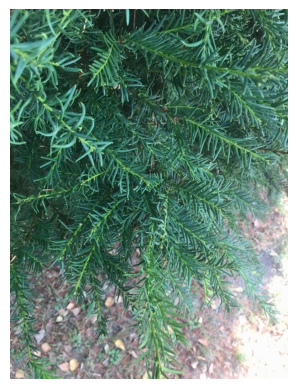

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Extract the URL
url = processed_df.iloc[0]['url']

# Fetch and display the image
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print(f"Failed to load image: {response.status_code}")


In [ ]:
print("species_ids_df type:", type(species_ids_df))
print("species_ids_df columns:", species_ids_df.columns.tolist())
print(species_ids_df.head())

species_ids_df type: <class 'pandas.core.frame.DataFrame'>
species_ids_df columns: ['species_id']
   species_id
0     1355868
1     1355869
2     1355870
3     1355871
4     1355872


In [ ]:
print("processed_df type:", type(processed_df))
print("processed_df columns:", processed_df.columns.tolist())
print(processed_df.head(1))


processed_df type: <class 'pandas.core.frame.DataFrame'>
processed_df columns: ['organ', 'species_id', 'altitude', 'latitude', 'longitude', 'gbif_species_id', 'species', 'genus', 'family', 'url', 'image_backup_url']
  organ  species_id  altitude  latitude  longitude  gbif_species_id  \
0  leaf     1396710  205.9261  47.59216  19.362895        5284517.0   

            species  genus    family  \
0  Taxus baccata L.  Taxus  Taxaceae   

                                                 url  \
0  https://bs.plantnet.org/image/o/59feabe1c98f06...   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  


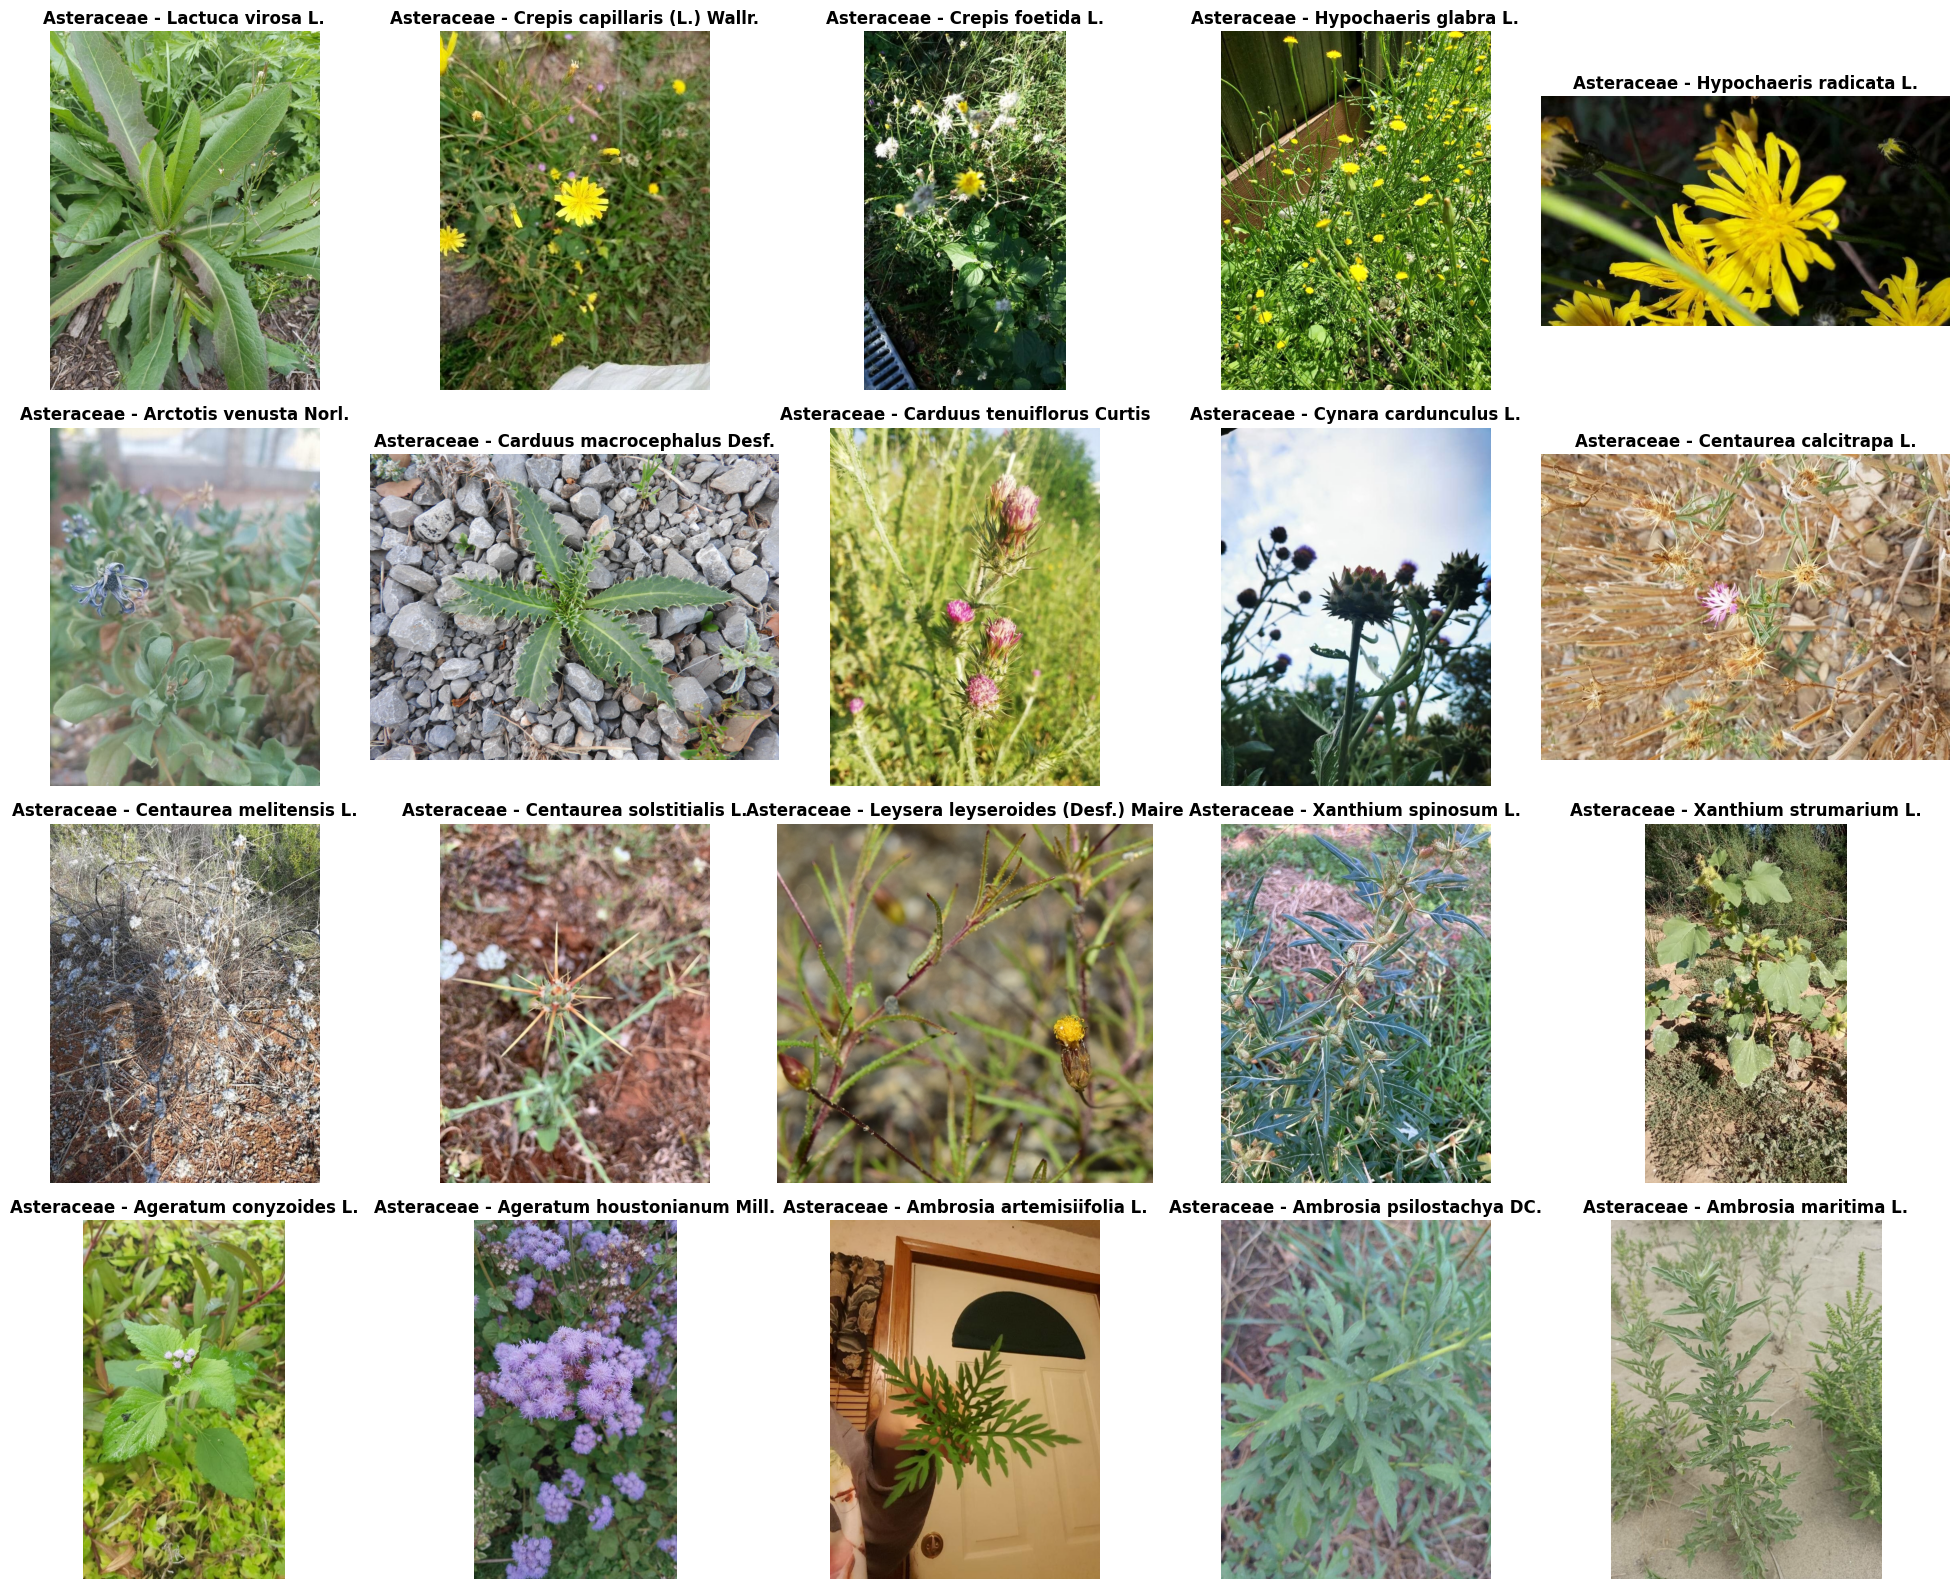

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for i in range(20):
    try:
        species_id = species_ids_df.loc[i, 'species_id']
        filtered_df = processed_df[processed_df['species_id'] == species_id]

        if not filtered_df.empty:
            url = filtered_df.iloc[0]['url']  # Get the first matching URL
            request = requests.get(url, timeout=5)
            img = Image.open(BytesIO(request.content))

            row, col = divmod(i, 5)  # Get row and col index from i
            axes[row, col].imshow(img)
            axes[row, col].axis('off')

            family = filtered_df.iloc[0]['family']
            species = filtered_df.iloc[0]['species']
            axes[row, col].set_title(f"{family} - {species}", fontsize=12, fontweight='bold')
        else:
            row, col = divmod(i, 5)
            axes[row, col].axis('off')
            axes[row, col].set_title("No data found", fontsize=12)

    except Exception as e:
        print(f"""
            [Image {i}] Failed to load
            species_id: {species_id if 'species_id' in locals() else 'N/A'}
            Exception Type: {type(e).__name__}
            Exception Details: {e}
            Full Trace: {repr(e)}
            """)
        row, col = divmod(i, 5)
        axes[row, col].axis('off')
        axes[row, col].set_title("Failed to load", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset , DataLoader
class PlantDataset(Dataset):
    def __init__(self , df , transform = None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self , idx):
        image_url = self.df.iloc[idx]['url']
        label = self.df.iloc[idx]['species_id']
        try:
            response = requests.get(image_url , timeout=10)
            img = Image.open(BytesIO(response.content)).convert('RGB')
        except Exception as e:
            print(f'The image is cant load from the given url because {e}')
            img = image.new('RGB' , (64 , 64))

        if self.transform:
            img = self.transform(img)
        return img , label

In [ ]:
data_trasform = transforms.Compose([
    transforms.Resize((64 , 64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

train_size = int(0.8 * len(processed_df))
test_size = int(len(processed_df) - train_size)

train_dataset  , test_dataset = torch.utils.data.random_split(PlantDataset(processed_df , transform=data_trasform) , [train_size , test_size])

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_dataset , batch_size=BATCH_SIZE , shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset , batch_size=BATCH_SIZE , shuffle=False)

print(f"Train Loader: {len(train_dataloader)} batches")
print(f"Test Loader: {len(test_dataloader)} batches")

Train Loader: 1126426 batches
Test Loader: 281607 batches


✅ Phase 1: Predict Species

In [ ]:
labels = processed_df['species_id']
class_names = labels.unique().tolist()
output_shape = len(class_names)
output_shape

7806

In [ ]:
class_names[:10]

[1396710,
 1356382,
 1359825,
 1360335,
 1363993,
 1361747,
 1356079,
 1360450,
 1356117,
 1360318]

In [ ]:
class Tiny_Vgg(nn.Module):
    def __init__(self , input_feature : int , hidden_units : int , output_feature : int):
        super().__init__()
        self.conv_Block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_feature , out_channels=hidden_units , kernel_size=3 , stride=1 , padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units , out_channels=hidden_units, kernel_size=3 , stride=1 , padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2 , stride=2 , padding=1)
        )

        self.conv_Block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units , out_channels=hidden_units,
                      kernel_size=3 , stride=1,  padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units , out_channels=hidden_units, kernel_size=3 , stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2 , stride=2 , padding=1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*17*17 , out_features=output_shape)
        )

    def forward(self , x):
        x = self.conv_Block_1(x)
        print(x.shape)
        x = self.conv_Block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [ ]:
torch.manual_seed(42)
model_0_CD = Tiny_Vgg(input_feature=3 , hidden_units=10 , output_feature=output_shape).to(device)
model_0_CD

Tiny_Vgg(
  (conv_Block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv_Block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2890, out_features=7806, bias=True)
  )
)

In [ ]:
image_batch , label_batch = next(iter(train_dataloader))

image_batch.shape , label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
processed_df.head(3)

organ  species_id  altitude   latitude  longitude  gbif_species_id  \
0  leaf     1396710  205.9261  47.592160  19.362895        5284517.0   
1  leaf     1396710  323.7520  47.906703   7.201746        5284517.0   
2  leaf     1396710  101.3160  48.826774   2.352774        5284517.0   

            species  genus    family  \
0  Taxus baccata L.  Taxus  Taxaceae   
1  Taxus baccata L.  Taxus  Taxaceae   
2  Taxus baccata L.  Taxus  Taxaceae   

                                                 url  \
0  https://bs.plantnet.org/image/o/59feabe1c98f06...   
1  https://bs.plantnet.org/image/o/dc273995a89827...   
2  https://bs.plantnet.org/image/o/416235e7023a4b...   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
2  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...

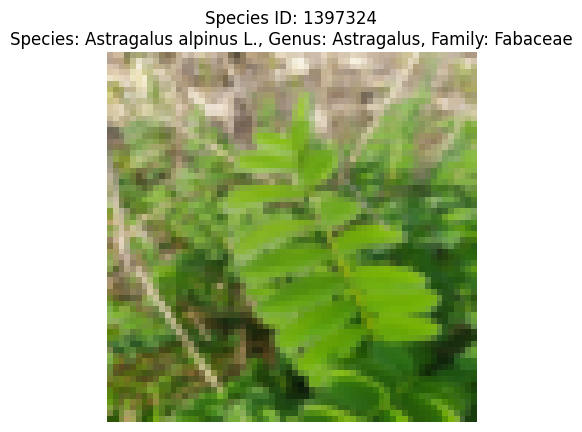

In [ ]:
species_id = label_batch.item()
row = processed_df[processed_df['species_id'] == species_id].iloc[0]
Species = row['species']
genus = row['genus']
family = row['family']
plt.imshow(image_batch.squeeze().permute(1 , 2 , 0) , cmap='viridis')
plt.title(f"Species ID: {species_id}\nSpecies: {species}, Genus: {genus}, Family: {family}")
plt.axis('off')
plt.show()

In [ ]:
image_batch = image_batch.to(device)
label_batch = label_batch.to(device)

output = model_0_CD(image_batch)


torch.Size([1, 10, 33, 33])
torch.Size([1, 10, 17, 17])
torch.Size([1, 7806])


In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [ ]:
torchinfo.summary(model=model_0_CD ,input_size=image_batch.shape)

torch.Size([1, 10, 33, 33])
torch.Size([1, 10, 17, 17])
torch.Size([1, 7806])


Layer (type:depth-idx)                   Output Shape              Param #
Tiny_Vgg                                 --                        --
├─Sequential: 1-1                        [1, 10, 33, 33]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 33, 33]           --
├─Sequential: 1-2                        [1, 10, 17, 17]           --
│    └─Conv2d: 2-6                       [1, 10, 33, 33]           910
│    └─ReLU: 2-7                         [1, 10, 33, 33]           --
│    └─Conv2d: 2-8                       [1, 10, 33, 33]           910
│    └─ReLU: 2-9                         [1, 10, 33, 33]           --
│    └─MaxPool2d: 2-10                   [1, 10, 17, 17]           --
├─Sequentia

In [ ]:
test_image_batch , test_image_label = next(iter(test_dataloader))
test_image_batch = test_image_batch.to(device)
test_image_label = test_image_batch.to(device)
test_image_batch.shape , test_image_label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_0_CD.eval()
with torch.inference_mode():
    test_image_batch  , test_image_label = next(iter(test_dataloader))
    test_image_batch = test_image_batch.to(device)
    output_logits = model_0_CD(test_image_batch)
    output_probs = torch.softmax(output_logits , dim=1)
    output_class = torch.argmax(output_probs , dim=1)
    predict_index = output_class.item()
    predicted_species_id = index_to_species_id[predict_index]
predicted_species_id , test_image_label

torch.Size([1, 10, 33, 33])
torch.Size([1, 10, 17, 17])
torch.Size([1, 7806])


(np.int64(1390943), tensor([1396429]))


✅ Prediction Result
Predicted Species ID : 1390943
Species : Carlina acanthifolia All.
Genus   : Carlina
Family  : Asteraceae

🎯 True Label
True Species ID      : 1396429
True Species         : Stachys glutinosa L.
True Genus           : Stachys
True Family          : Lamiaceae


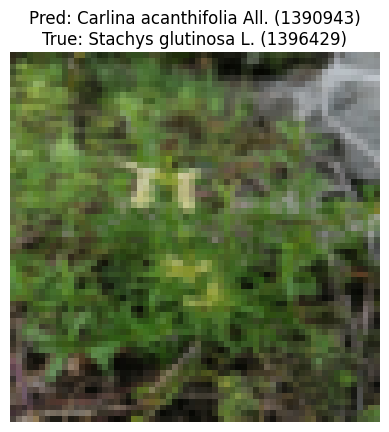

In [ ]:
# Get predicted info
predicted_row = processed_df[processed_df['species_id'] == predicted_species_id].iloc[0]
pred_species = predicted_row['species']
pred_genus = predicted_row['genus']
pred_family = predicted_row['family']

# Get true info
true_species_id = test_image_label.item()
true_row = processed_df[processed_df['species_id'] == true_species_id].iloc[0]
true_species = true_row['species']
true_genus = true_row['genus']
true_family = true_row['family']

# Print nicely
print(f"\n✅ Prediction Result")
print(f"Predicted Species ID : {predicted_species_id}")
print(f"Species : {pred_species}")
print(f"Genus   : {pred_genus}")
print(f"Family  : {pred_family}")

print(f"\n🎯 True Label")
print(f"True Species ID      : {true_species_id}")
print(f"True Species         : {true_species}")
print(f"True Genus           : {true_genus}")
print(f"True Family          : {true_family}")

# Plot image with both predicted and true label
plt.imshow(test_image_batch.cpu().squeeze().permute(1, 2, 0))
plt.title(f"Pred: {pred_species} ({predicted_species_id})\nTrue: {true_species} ({true_species_id})")
plt.axis('off')
plt.show()
